In [18]:
import ast
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
silda_feeding = pd.read_csv('/root/data/bryton/silda_feeding.csv', delimiter = ';')

In [13]:
silda_feeding.head()

,id,entryName,content,timestamp,seqNo,mealenumeration
0,1,150759_cagecontainer2,"{ \actualamount\"" : 12433.8, \""calcamount\"" : ...",2018-09-18 10:49:53,1,1
1,2,150759_cagecontainer3,"{ \actualamount\"" : 16073.6, \""calcamount\"" : ...",2018-09-18 10:50:11,2,1
2,3,150759_cagecontainer2,"{ \actualamount\"" : 12433.8, \""calcamount\"" : ...",2018-09-18 10:52:04,3,2
3,4,150759_cagecontainer3,"{ \actualamount\"" : 16073.6, \""calcamount\"" : ...",2018-09-18 10:52:41,4,2
4,5,150759_cagecontainer2,"{ \actualamount\"" : 12433.8, \""calcamount\"" : ...",2018-09-18 10:54:14,5,3


In [29]:
actualamount = []
calcamount = []
doserid = []
endtime = []
feedingtype = []
gramspersec = []
kgtonmin = []
pelletfishmin = []
siloid = []
starttime = []

for index, row in silda_feeding.iterrows():
    data = ast.literal_eval(row['content'].replace("\\actual", "\\\"actual").replace("\\", "")[:-1])
    
    actualamount.append(data['actualamount'])
    calcamount.append(data['calcamount'])
    doserid.append(data['doserid'])
    endtime.append(data['endtime'])
    feedingtype.append(data['feedingtype'])
    gramspersec.append(data['gramspersec'])
    kgtonmin.append(data['kgtonmin'])
    pelletfishmin.append(data['pelletfishmin'])
    siloid.append(data['siloid'])
    starttime.append(data['starttime'])

In [30]:
silda_feeding['actualamount'] = actualamount
silda_feeding['calcamount'] = calcamount
silda_feeding['doserid'] = doserid
silda_feeding['endtime'] = endtime
silda_feeding['feedingtype'] = feedingtype
silda_feeding['gramspersec'] = gramspersec
silda_feeding['kgtonmin'] = kgtonmin
silda_feeding['pelletfishmin'] = pelletfishmin
silda_feeding['siloid'] = siloid
silda_feeding['starttime'] = starttime

In [50]:
silda_feeding.tail()

,id,entryName,content,timestamp,seqNo,mealenumeration,actualamount,calcamount,doserid,endtime,feedingtype,gramspersec,kgtonmin,pelletfishmin,siloid,starttime,date,datetime
203846,203847,150759_cagecontainer2,"{ \actualamount\"" : 2613.67, \""calcamount\"" : ...",2021-03-17 14:45:08,203847,136,2613.67,2613.18,150759_pulsedoser3,2021-03-17T14:45:07,auto,494.0,0.094315,0.0,150759_pulsedoser3_Silo,2021-03-17T14:45:00,2021-03-17,2021-03-17 14:45:00
203847,203848,150759_cagecontainer2,"{ \actualamount\"" : 2613.67, \""calcamount\"" : ...",2021-03-17 14:48:08,203848,137,2613.67,2613.18,150759_pulsedoser3,2021-03-17T14:48:07,auto,494.0,0.094315,0.0,150759_pulsedoser3_Silo,2021-03-17T14:48:00,2021-03-17,2021-03-17 14:48:00
203848,203849,150759_cagecontainer2,"{ \actualamount\"" : 2613.67, \""calcamount\"" : ...",2021-03-17 14:51:08,203849,138,2613.67,2613.18,150759_pulsedoser3,2021-03-17T14:51:07,auto,494.0,0.094315,0.0,150759_pulsedoser3_Silo,2021-03-17T14:51:00,2021-03-17,2021-03-17 14:51:00
203849,203850,150759_cagecontainer2,"{ \actualamount\"" : 2613.67, \""calcamount\"" : ...",2021-03-17 14:54:08,203850,139,2613.67,2613.18,150759_pulsedoser3,2021-03-17T14:54:07,auto,494.0,0.094315,0.0,150759_pulsedoser3_Silo,2021-03-17T14:54:00,2021-03-17,2021-03-17 14:54:00
203850,203851,150759_cagecontainer2,"{ \actualamount\"" : 2613.67, \""calcamount\"" : ...",2021-03-17 14:57:08,203851,140,2613.67,2613.18,150759_pulsedoser3,2021-03-17T14:57:07,auto,494.0,0.094315,0.0,150759_pulsedoser3_Silo,2021-03-17T14:57:00,2021-03-17,2021-03-17 14:57:00


In [80]:
from datetime import datetime

datetimes = []
dates = []
hours = []

for index, row in silda_feeding.iterrows():
    if row['starttime']:
        dt = datetime.strptime(row['starttime'], '%Y-%m-%dT%H:%M:%S')
        datetimes.append(dt)
        dates.append(dt.strftime('%Y-%m-%d'))
        hours.append(dt.hour + dt.minute / 60.0)
    else:
        datetimes.append(None)
        dates.append(None)
        hours.append(None)
    
silda_feeding['datetime'] = datetimes
silda_feeding['date'] = dates
silda_feeding['hour'] = hours

In [83]:
df.head()

,id,entryName,content,timestamp,seqNo,mealenumeration,actualamount,calcamount,doserid,endtime,feedingtype,gramspersec,kgtonmin,pelletfishmin,siloid,starttime,date,datetime,hour
201872,201873,150759_cagecontainer2,"{ \actualamount\"" : 2425.19, \""calcamount\"" : ...",2021-03-01 08:02:39,201873,1,2425.19,2423.14,150759_pulsedoser2,2021-03-01T08:02:38,auto,452.0,0.059827,0.0,150759_pulsedoser2_Silo,2021-03-01T08:02:33,2021-03-01,2021-03-01 08:02:33,8.033333
201873,201874,150759_cagecontainer2,"{ \actualamount\"" : 2425.19, \""calcamount\"" : ...",2021-03-01 08:03:46,201874,2,2425.19,2423.14,150759_pulsedoser2,2021-03-01T08:03:45,auto,452.0,0.059827,0.0,150759_pulsedoser2_Silo,2021-03-01T08:03:40,2021-03-01,2021-03-01 08:03:40,8.050000
201874,201875,150759_cagecontainer2,"{ \actualamount\"" : 2425.19, \""calcamount\"" : ...",2021-03-01 08:06:07,201875,3,2425.19,2423.14,150759_pulsedoser2,2021-03-01T08:06:06,auto,452.0,0.059827,0.0,150759_pulsedoser2_Silo,2021-03-01T08:06:00,2021-03-01,2021-03-01 08:06:00,8.100000
201875,201876,150759_cagecontainer2,"{ \actualamount\"" : 2425.19, \""calcamount\"" : ...",2021-03-01 08:09:07,201876,4,2425.19,2423.14,150759_pulsedoser2,2021-03-01T08:09:06,auto,452.0,0.059827,0.0,150759_pulsedoser2_Silo,2021-03-01T08:09:00,2021-03-01,2021-03-01 08:09:00,8.150000
201876,201877,150759_cagecontainer2,"{ \actualamount\"" : 2425.19, \""calcamount\"" : ...",2021-03-01 08:12:07,201877,5,2425.19,2423.14,150759_pulsedoser2,2021-03-01T08:12:06,auto,452.0,0.059827,0.0,150759_pulsedoser2_Silo,2021-03-01T08:12:00,2021-03-01,2021-03-01 08:12:00,8.200000


['150759_cagecontainer3', '150759_cagecontainer2']

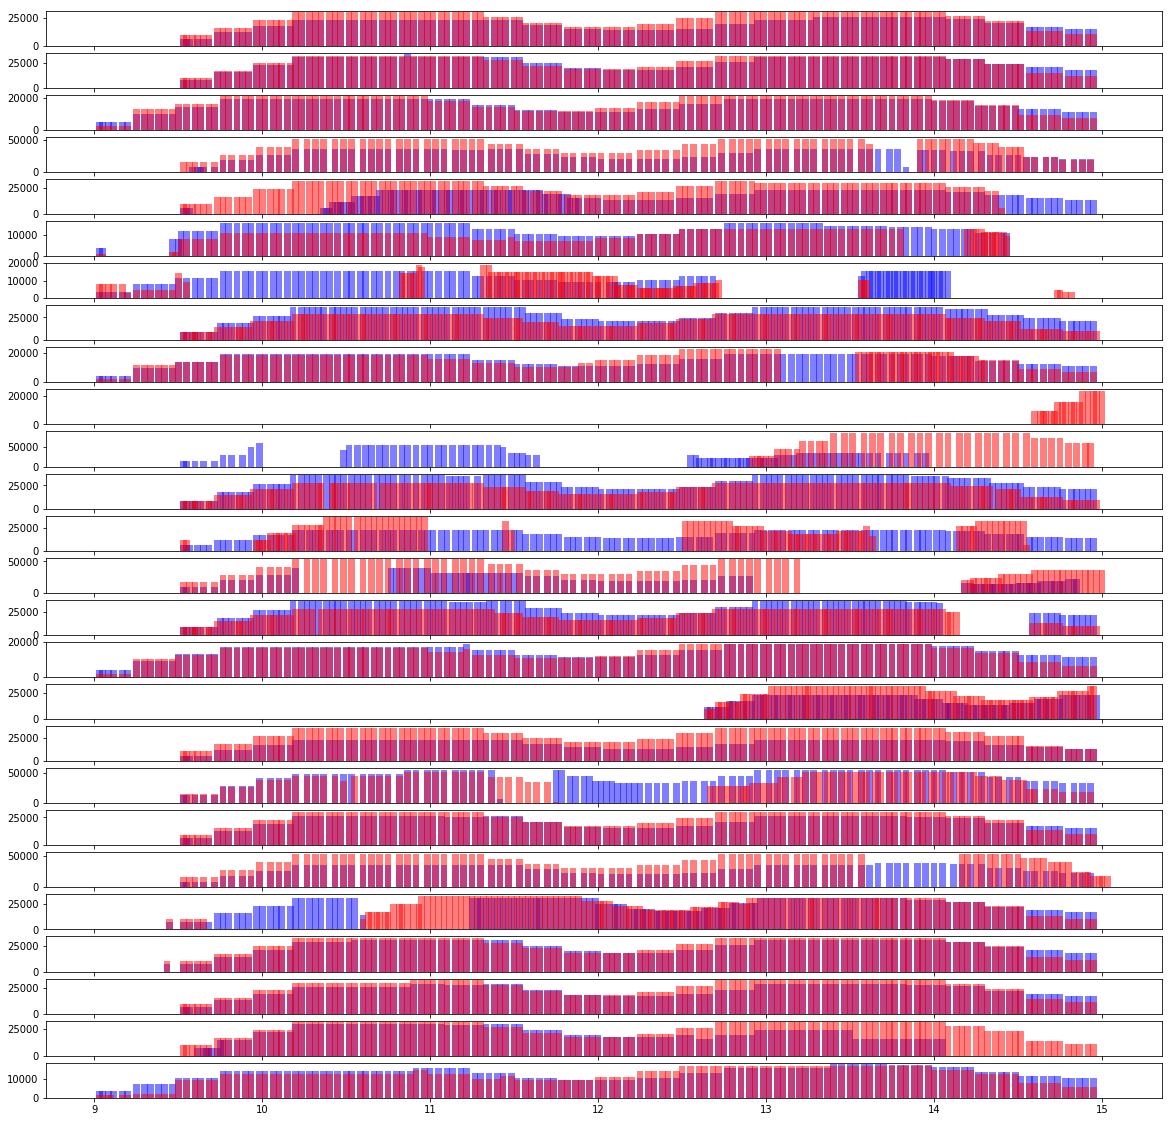

In [93]:
mask = (silda_feeding.date >= '2021-01-01') & (silda_feeding.date < '2021-02-01')
df = silda_feeding[mask]

cages = list(set(df.entryName))
dates = list(set(df.date))

fig, axes = plt.subplots(len(dates), sharex = True, figsize = (20, 20))

for index, ax in enumerate(axes):
    curr_date = dates[index]
    mask2 = (df.date == curr_date) & (df.entryName == cages[1])
    df2 = df[mask2]
    ax.bar(df2.hour, df2.actualamount, alpha = 0.5, color = 'blue', width = 0.04)
    
    mask2 = (df.date == curr_date) & (df.entryName == cages[0])
    df2 = df[mask2]
    ax.bar(df2.hour, df2.actualamount, alpha = 0.5, color = 'red', width = 0.04)

In [94]:
optimal_feeding = pd.read_csv('/root/data/bryton/feeding_hour_pen_86.csv')

In [203]:
df2.head()

,id,entryName,content,timestamp,seqNo,mealenumeration,actualamount,calcamount,doserid,endtime,feedingtype,gramspersec,kgtonmin,pelletfishmin,siloid,starttime,date,datetime,hour
190875,190876,150759_cagecontainer3,"{ \actualamount\"" : 16373.1, \""calcamount\"" : ...",2021-01-07 09:33:03,190876,1,16373.1,16365.3,150759_pulsedoser5,2021-01-07T09:33:01,auto,600.0,0.072701,0.0,150759_pulsedoser5_Silo,2021-01-07T09:32:33,2021-01-07,2021-01-07 09:32:33,9.533333
190877,190878,150759_cagecontainer3,"{ \actualamount\"" : 16373.1, \""calcamount\"" : ...",2021-01-07 09:34:32,190878,2,16373.1,16365.3,150759_pulsedoser5,2021-01-07T09:34:31,auto,600.0,0.072701,0.0,150759_pulsedoser5_Silo,2021-01-07T09:34:03,2021-01-07,2021-01-07 09:34:03,9.566667
190879,190880,150759_cagecontainer3,"{ \actualamount\"" : 16373.1, \""calcamount\"" : ...",2021-01-07 09:37:06,190880,3,16373.1,16365.3,150759_pulsedoser5,2021-01-07T09:37:05,auto,600.0,0.072701,0.0,150759_pulsedoser5_Silo,2021-01-07T09:36:37,2021-01-07,2021-01-07 09:36:37,9.600000
190881,190882,150759_cagecontainer3,"{ \actualamount\"" : 16373.1, \""calcamount\"" : ...",2021-01-07 09:40:24,190882,4,16373.1,16365.3,150759_pulsedoser5,2021-01-07T09:40:23,auto,600.0,0.072701,0.0,150759_pulsedoser5_Silo,2021-01-07T09:39:54,2021-01-07,2021-01-07 09:39:54,9.650000
190883,190884,150759_cagecontainer3,"{ \actualamount\"" : 16373.1, \""calcamount\"" : ...",2021-01-07 09:43:41,190884,5,16373.1,16365.3,150759_pulsedoser5,2021-01-07T09:43:40,auto,600.0,0.072701,0.0,150759_pulsedoser5_Silo,2021-01-07T09:43:12,2021-01-07,2021-01-07 09:43:12,9.716667


In [251]:
# 

date = '2021-03-03'
mask2 = (silda_feeding.date == date) & (silda_feeding.entryName == cages[0])
df2 = silda_feeding[mask2]


def get_periods(df3):
    periods = []
    
    my_starttime = None
    last_endtime = None

    for index, row in df3.iterrows():
        if not row['endtime']:
            continue
        
        if last_endtime is not None:
            timediff = (datetime.strptime(row['starttime'], '%Y-%m-%dT%H:%M:%S') - last_endtime).total_seconds()
            if timediff > 300:
                periods.append((my_starttime, last_endtime))
                my_starttime = None

        last_endtime = datetime.strptime(row['endtime'], '%Y-%m-%dT%H:%M:%S')
        if my_starttime is None:
            my_starttime = datetime.strptime(row['starttime'], '%Y-%m-%dT%H:%M:%S')

    periods.append((my_starttime, last_endtime))
    
    return periods

get_periods(df2)

[(datetime.datetime(2021, 3, 3, 10, 22, 52),
  datetime.datetime(2021, 3, 3, 14, 57, 11))]

In [216]:
periods

[(datetime.datetime(2021, 1, 2, 9, 32, 33),
  datetime.datetime(2021, 1, 2, 14, 9, 23)),
 (datetime.datetime(2021, 1, 2, 14, 35, 58),
  datetime.datetime(2021, 1, 2, 14, 58, 27))]

In [254]:
dates = sorted(list(set(optimal_feeding['date'])))
dates

['2020-12-01',
 '2020-12-02',
 '2020-12-03',
 '2020-12-04',
 '2020-12-05',
 '2020-12-06',
 '2020-12-07',
 '2020-12-08',
 '2020-12-09',
 '2020-12-10',
 '2020-12-11',
 '2020-12-12',
 '2020-12-13',
 '2020-12-14',
 '2020-12-15',
 '2020-12-16',
 '2020-12-17',
 '2020-12-18',
 '2020-12-19',
 '2020-12-20',
 '2020-12-21',
 '2020-12-22',
 '2020-12-23',
 '2020-12-24',
 '2020-12-25',
 '2020-12-26',
 '2020-12-27',
 '2020-12-28',
 '2020-12-29',
 '2020-12-30',
 '2020-12-31',
 '2021-01-01',
 '2021-01-02',
 '2021-01-03',
 '2021-01-04',
 '2021-01-05',
 '2021-01-06',
 '2021-01-07',
 '2021-01-08',
 '2021-01-09',
 '2021-01-10',
 '2021-01-11',
 '2021-01-12',
 '2021-01-13',
 '2021-01-14',
 '2021-01-15',
 '2021-01-16',
 '2021-01-17',
 '2021-01-18',
 '2021-01-19',
 '2021-01-20',
 '2021-01-21',
 '2021-01-22',
 '2021-01-23',
 '2021-01-24',
 '2021-01-25',
 '2021-01-26',
 '2021-01-27',
 '2021-01-28',
 '2021-01-29',
 '2021-01-30',
 '2021-01-31',
 '2021-02-01',
 '2021-02-02',
 '2021-02-03',
 '2021-02-04',
 '2021-02-

In [255]:
min_hours1 = []
max_hours1 = []

min_hours2 = []
max_hours2 = []

periods1 = []
periods2 = []

for date in dates:
    print(date)
    mask2 = (silda_feeding.date == date) & (silda_feeding.entryName == cages[0])
    df2 = silda_feeding[mask2]
    
    if len(df2.hour) > 0:
        min_hour = min(df2.hour)
        max_hour = max(df2.hour)

        min_hours1.append(min_hour)
        max_hours1.append(max_hour)
        periods1.append(get_periods(df2))
    else:
        min_hours1.append(None)
        max_hours1.append(None)
        periods1.append([])
        
    mask2 = (silda_feeding.date == date) & (silda_feeding.entryName == cages[1])
    df2 = silda_feeding[mask2]
    
    if len(df2.hour) > 0:
        min_hour = min(df2.hour)
        max_hour = max(df2.hour)

        min_hours2.append(min_hour)
        max_hours2.append(max_hour)
        periods2.append(get_periods(df2))
    else:
        min_hours2.append(None)
        max_hours2.append(None)
        periods2.append([])

2020-12-01
2020-12-02
2020-12-03
2020-12-04
2020-12-05
2020-12-06
2020-12-07
2020-12-08
2020-12-09
2020-12-10
2020-12-11
2020-12-12
2020-12-13
2020-12-14
2020-12-15
2020-12-16
2020-12-17
2020-12-18
2020-12-19
2020-12-20
2020-12-21
2020-12-22
2020-12-23
2020-12-24
2020-12-25
2020-12-26
2020-12-27
2020-12-28
2020-12-29
2020-12-30
2020-12-31
2021-01-01
2021-01-02
2021-01-03
2021-01-04
2021-01-05
2021-01-06
2021-01-07
2021-01-08
2021-01-09
2021-01-10
2021-01-11
2021-01-12
2021-01-13
2021-01-14
2021-01-15
2021-01-16
2021-01-17
2021-01-18
2021-01-19
2021-01-20
2021-01-21
2021-01-22
2021-01-23
2021-01-24
2021-01-25
2021-01-26
2021-01-27
2021-01-28
2021-01-29
2021-01-30
2021-01-31
2021-02-01
2021-02-02
2021-02-03
2021-02-04
2021-02-05
2021-02-06
2021-02-07
2021-02-08
2021-02-09
2021-02-10
2021-02-11
2021-02-12
2021-02-13
2021-02-14
2021-02-15
2021-02-16
2021-02-17
2021-02-18
2021-02-19
2021-02-20
2021-02-21
2021-02-22
2021-02-23
2021-02-24
2021-02-25
2021-02-26
2021-02-27
2021-02-28
2021-03-01

In [256]:
optimal_feeding['min_hours1'] = min_hours1
optimal_feeding['max_hours1'] = max_hours1
optimal_feeding['min_hours2'] = min_hours2
optimal_feeding['max_hours2'] = max_hours2
optimal_feeding['periods1'] = periods1
optimal_feeding['periods2'] = periods2

In [257]:
optimal_feeding.tail()

,date,start_hour,end_hour,min_hours1,max_hours1,min_hours2,max_hours2,weights1,weights2,weights3,periods1,periods2,weights4
91,2021-03-02,9,14,NaN,NaN,8.033333,14.950000,5350.867026,5362.104432,5363.921221,[],"[(2021-03-02 08:02:33, 2021-03-02 14:57:15)]",5587.108087
92,2021-03-03,9,14,10.366667,14.95,8.033333,14.766667,5450.356487,5492.311807,5492.311807,"[(2021-03-03 10:22:52, 2021-03-03 14:57:11)]","[(2021-03-03 08:02:33, 2021-03-03 10:21:27), (...",5474.397742
93,2021-03-04,9,14,8.033333,10.05,8.033333,14.950000,5365.834516,5289.620412,5264.244245,"[(2021-03-04 08:02:33, 2021-03-04 10:03:35)]","[(2021-03-04 08:02:33, 2021-03-04 14:57:14)]",4869.971663
94,2021-03-05,9,14,NaN,NaN,8.033333,15.933333,5402.670266,5454.307787,5449.248336,[],"[(2021-03-05 08:02:33, 2021-03-05 08:27:10), (...",4750.529393
95,2021-03-06,8,14,NaN,NaN,8.033333,14.966667,NaN,NaN,NaN,[],"[(2021-03-06 08:02:33, 2021-03-06 14:58:45)]",NaN


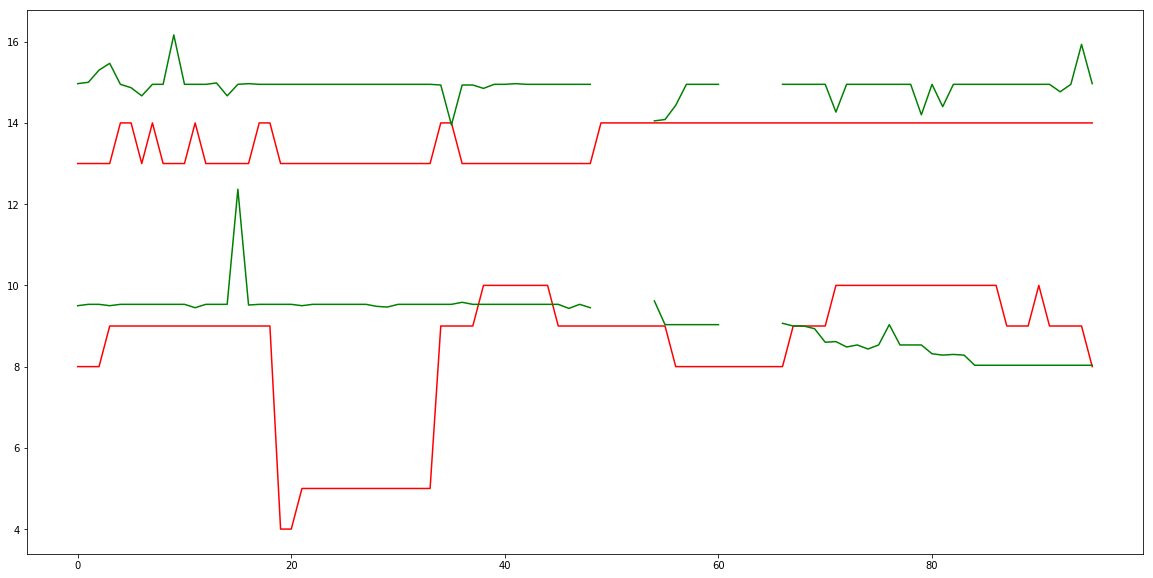

In [261]:
plt.figure(figsize=(20,10))
plt.plot(optimal_feeding['start_hour'], color = 'red')
plt.plot(optimal_feeding['end_hour'], color = 'red')
# plt.plot(optimal_feeding['min_hours1'], color = 'blue')
# plt.plot(optimal_feeding['max_hours1'], color = 'blue')
plt.plot(optimal_feeding['min_hours2'], color = 'green')
plt.plot(optimal_feeding['max_hours2'], color = 'green')

In [240]:
optimal_feeding.head()

,date,start_hour,end_hour,min_hours1,max_hours1,min_hours2,max_hours2,weights1,weights2,weights3,periods1,periods2,weights4
0,2020-12-01,8,13,9.533333,14.950000,9.533333,14.95,4245.644892,4180.323476,4116.894436,"[(2021-01-13 09:32:33, 2021-01-13 14:57:57)]","[(2021-01-13 09:32:33, 2021-01-13 14:58:06)]",4950.810320
1,2020-12-02,8,13,9.033333,14.950000,9.033333,14.95,4199.058134,4173.277847,4172.768704,"[(2021-01-30 09:02:33, 2021-01-30 14:57:39)]","[(2021-01-30 09:02:33, 2021-01-30 14:57:45)]",4992.958452
2,2020-12-03,8,13,9.533333,14.966667,9.533333,14.95,4201.704982,4158.111955,4149.053303,"[(2020-12-05 09:32:33, 2020-12-05 13:28:47), (...","[(2020-12-05 09:32:33, 2020-12-05 13:29:42), (...",4029.356120
3,2020-12-04,9,13,8.483333,14.950000,8.483333,14.95,4288.173215,4273.765955,4266.499411,"[(2021-02-11 08:29:55, 2021-02-11 12:46:45), (...","[(2021-02-11 08:29:55, 2021-02-11 14:57:34)]",4973.891077
4,2020-12-05,9,14,8.033333,14.900000,9.000000,14.95,4020.376824,4010.501230,4010.874191,"[(2021-02-06 08:02:33, 2021-02-06 14:55:23)]","[(2021-02-06 09:00:31, 2021-02-06 14:57:45)]",5407.885383


In [121]:
import os, json

from research.utils.data_access_utils import RDSAccessUtils, S3AccessUtils

rds_access_utils = RDSAccessUtils(json.load(open(os.environ['DATA_WAREHOUSE_SQL_CREDENTIALS'])))

In [129]:
import numpy as np

from research.weight_estimation.keypoint_utils.optics import euclidean_distance, pixel2world, depth_from_disp, convert_to_world_point


In [125]:
queryCache = {}

In [130]:
def getPenDF(pen):
    query = """
       SELECT captured_at, estimated_weight_g, akpd_score, annotation, camera_metadata FROM prod.biomass_computations
        WHERE prod.biomass_computations.captured_at >= '%s'
        AND prod.biomass_computations.captured_at <= '%s'
        AND prod.biomass_computations.pen_id = '%s';
    """ % (pen['start_date'], pen['end_date'], pen['pen_id'])
    
    if query in queryCache:
        df = queryCache[query].copy()
    else:
        df = rds_access_utils.extract_from_database(query)
        queryCache[query] = df.copy()

    df = df.sort_values('captured_at').copy(deep=True)
    df.index = pd.to_datetime(df.captured_at)
    dates = df.index.date.astype(str)
    df['date'] = dates
    df['hour'] = df.index.hour
    
    depths = []
    for idx, row in df.iterrows():
        ann, cm = row.annotation, row.camera_metadata
        wkps = pixel2world(ann['leftCrop'], ann['rightCrop'], cm)
        depth = np.median([wkp[1] for wkp in wkps.values()])
        depths.append(depth)
    df['depth'] = depths
    
    return df
    
pen1 = {
    'pen_id': 86,
    'start_date': '2020-12-01',
    'end_date': '2021-03-06'
}

df1 = getPenDF(pen1)

/home/user/miniconda/envs/py36/lib/python3.6/site-packages/research/weight_estimation/keypoint_utils/optics.py:37: RuntimeWarning: divide by zero encountered in true_divide
  depth = focal_length_pixel * baseline / np.array(disp)


In [262]:
df2 = df1[df1.akpd_score > 0.95]

In [226]:
df2.head()

,captured_at,estimated_weight_g,akpd_score,annotation,camera_metadata,date,hour,depth
captured_at,,,,,,,,
2020-12-01 00:02:27.049543+00:00,2020-12-01 00:02:27.049543+00:00,695.048124,0.964785,"{'leftCrop': [{'xCrop': 526, 'yCrop': 378, 'xF...","{'baseline': 0.100069071081892, 'focalLength':...",2020-12-01,0,0.686936
2020-12-01 00:02:34.117961+00:00,2020-12-01 00:02:34.117961+00:00,4681.701064,0.995446,"{'leftCrop': [{'xCrop': 406, 'yCrop': 796, 'xF...","{'baseline': 0.100069071081892, 'focalLength':...",2020-12-01,0,1.206244
2020-12-01 00:02:45.142305+00:00,2020-12-01 00:02:45.142305+00:00,4472.430050,0.971717,"{'leftCrop': [{'xCrop': 454, 'yCrop': 617, 'xF...","{'baseline': 0.100069071081892, 'focalLength':...",2020-12-01,0,1.020022
2020-12-01 00:02:47.153369+00:00,2020-12-01 00:02:47.153369+00:00,4327.478409,0.997623,"{'leftCrop': [{'xCrop': 438, 'yCrop': 631, 'xF...","{'baseline': 0.100069071081892, 'focalLength':...",2020-12-01,0,1.034572
2020-12-01 00:03:04.239620+00:00,2020-12-01 00:03:04.239620+00:00,991.539285,0.975821,"{'leftCrop': [{'xCrop': 375, 'yCrop': 743, 'xF...","{'baseline': 0.100069071081892, 'focalLength':...",2020-12-01,0,0.778122


In [159]:
int((14.5 % 1) * 60)


30

In [156]:
import pytz

# df2.iloc[0]['date']
# df2.iloc[0]['captured_at'].hour

utc=pytz.UTC

datetime.strptime(df2.iloc[0]['date'], '%Y-%m-%d').replace(hour = min_hours1).replace(tzinfo=utc)

TypeError: an integer is required (got type list)

In [300]:
weights1 = []
weights2 = []
weights3 = []
weights4 = []

all_weights1 = []
all_weights2 = []
all_weights3 = []
all_weights4 = []

for index, row in optimal_feeding.iterrows():
    start_time1 = datetime.strptime(row['date'], '%Y-%m-%d').replace(hour = row['start_hour']).replace(tzinfo=utc)
    end_time1 = datetime.strptime(row['date'], '%Y-%m-%d').replace(hour = row['end_hour']).replace(tzinfo=utc)
    
    all_weight1 = df2[(df2.captured_at >= start_time1) & (df2.captured_at <= end_time1)].estimated_weight_g
    all_weights1.append(all_weight1)
    weight1 = np.mean(all_weight1)
    
    if not np.isnan(row['min_hours1']):
        start_time2 = datetime.strptime(row['date'], '%Y-%m-%d').replace(hour = int(row['min_hours1']), minute = int((row['min_hours1'] % 1) * 60)).replace(tzinfo=utc)
        end_time2 = datetime.strptime(row['date'], '%Y-%m-%d').replace(hour = int(row['max_hours1']), minute = int((row['max_hours1'] % 1) * 60)).replace(tzinfo=utc)
        all_weight2 = df2[(df2.captured_at >= start_time2) & (df2.captured_at <= end_time2)].estimated_weight_g
        all_weights2.append(all_weight2)
        weight2 = np.mean(all_weight2)
    else:
        all_weights2.append([])
        weight2 = None
        
    if not np.isnan(row['min_hours1']):
        start_time2 = datetime.strptime(row['date'], '%Y-%m-%d').replace(hour = round(row['min_hours1'])).replace(tzinfo=utc)
        end_time2 = datetime.strptime(row['date'], '%Y-%m-%d').replace(hour = round(row['max_hours1'])).replace(tzinfo=utc)
        all_weight3 = df2[(df2.captured_at >= start_time2) & (df2.captured_at <= end_time2)].estimated_weight_g
        all_weights3.append(all_weight3)
        weight3 = np.mean(all_weight3)
    else:
        all_weights3.append([])
        weight3 = None
        
    allweights4 = []
    for start, end in row['periods1']:
        allweights4.extend(df2[(df2.captured_at >= start.replace(tzinfo=utc)) & (df2.captured_at <= end.replace(tzinfo=utc))].estimated_weight_g)
#         print(start, end)
        
    all_weights4.append(allweights4)
        
    weights1.append(weight1)
    weights2.append(weight2)
    weights3.append(weight3)
    weights4.append(np.mean(allweights4))
    
optimal_feeding['weights1'] = weights1
optimal_feeding['weights2'] = weights2
optimal_feeding['weights3'] = weights3
optimal_feeding['weights4'] = weights4

(array([1.65583244e-05, 5.51944148e-05, 1.93180452e-04, 4.02919228e-04,
        4.30516436e-04, 2.64933191e-04, 1.87661010e-04, 1.15908271e-04,
        8.83110637e-05, 2.75972074e-05]),
 array([1695.57824731, 2256.50008023, 2817.42191315, 3378.34374607,
        3939.26557899, 4500.1874119 , 5061.10924482, 5622.03107774,
        6182.95291066, 6743.87474358, 7304.7965765 ]),
 <a list of 10 Patch objects>)

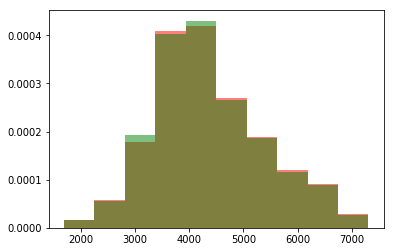

In [334]:
plt.hist(all_weights4[7], color = 'red', alpha = 0.5, density = True)
plt.hist(all_weights1[7], color = 'green', alpha = 0.5, density = True)


# np.mean([ len(n) for n in all_weights1 ]), np.mean([ len(n) for n in all_weights4 ])

In [325]:
1 / np.sqrt(328 / 397)

1.1001662845490843

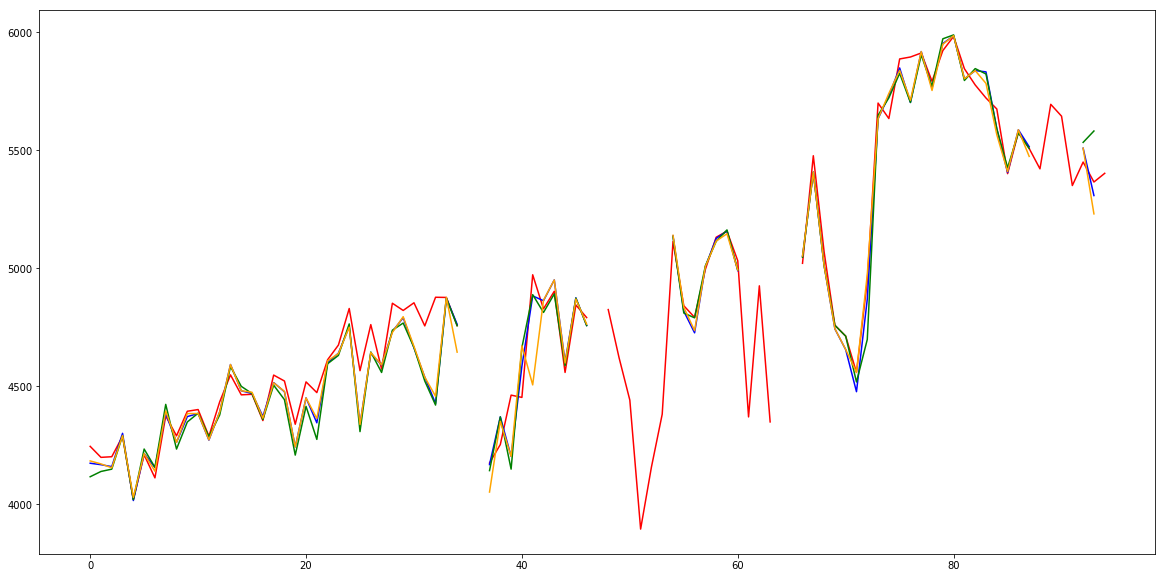

In [275]:
plt.figure(figsize=(20,10))
plt.plot(weights1, color = 'red')
plt.plot(weights2, color = 'blue')
plt.plot(weights3, color = 'green')
plt.plot(weights4, color = 'orange')

In [282]:
np.std(np.diff(weights1)[~np.isnan(np.diff(weights1))])

244.42335520824682

In [295]:
wt2 = [ np.nan if n is None else n for n in weights2 ]
np.std(np.diff(wt2)[~np.isnan(np.diff(wt2))])

216.8271796873591

In [296]:
wt3 = [ np.nan if n is None else n for n in weights3 ]
np.std(np.diff(wt3)[~np.isnan(np.diff(wt3))])

225.64143250769575

In [297]:
wt4 = [ np.nan if n is None else n for n in weights4 ]
np.std(np.diff(wt4)[~np.isnan(np.diff(wt4))])

216.60929230867592

In [299]:
(216 - 244) / 216

-0.12962962962962962

In [270]:
err = (optimal_feeding['weights1'] - optimal_feeding['weights2']) / optimal_feeding['weights2']
np.median(np.abs(err[~np.isnan(err)])), np.mean(np.abs(err[~np.isnan(err)]))

(0.007463569564841542, 0.012724298429366824)

In [271]:
err = (optimal_feeding['weights3'] - optimal_feeding['weights2']) / optimal_feeding['weights2']
np.median(np.abs(err[~np.isnan(err)])), np.mean(np.abs(err[~np.isnan(err)]))

(0.0023914717816386102, 0.004804717990359603)

In [269]:
err = (optimal_feeding['weights4'] - optimal_feeding['weights2']) / optimal_feeding['weights2']
np.median(np.abs(err[~np.isnan(err)])), np.mean(np.abs(err[~np.isnan(err)]))

(0.0007517168869527087, 0.003956566709511152)

In [274]:
err = (optimal_feeding['weights4'] - optimal_feeding['weights3']) / optimal_feeding['weights3']
np.median(np.abs(err[~np.isnan(err)])), np.mean(np.abs(err[~np.isnan(err)]))

(0.0031703494973349157, 0.007312720673470186)